# Imports


In [203]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [204]:
import numpy as np
from scripts.gaussian.streaming_clusterer import CluStream
from scripts.gaussian.dynamic_clusterer_multidimension import DynamicClusterer
from scripts.utils import get_colors

from river import drift

In [205]:
def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

In [206]:
# file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

# file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
# file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
# file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
# file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
# file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [207]:
def init_dynamic_clusterer(data=reference_data, threshold=2.5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    ph_drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data,
        model=clustream_model,
        drift_detector=ph_drift_detector,
        colors=get_colors(),
        ax_limit=10,
        phi=100,
        alpha=0.90,
        epsilon=0,
        n_points_per_dimension=500,
        stop_mode=True
    )

    return dynamic_clusterer

New model created - id: 87061
Fitting model to reference data...
Applying macroclustering...
(id: 0)
(id: 1)
timestamp 100 ----> Apply macroclustering <!>

ref0 - center: [np.float64(4.003173564419602), np.float64(4.678504975004629), np.float64(8.046597660490962), np.float64(7.792387877449846), np.float64(7.4297847061446225), np.float64(6.483524509451606), np.float64(5.506643621307431), np.float64(2.585485827742201), np.float64(6.137674857269634), np.float64(3.012683547807462), np.float64(6.013221721757542), np.float64(2.538248532197692), np.float64(5.424701316790148), np.float64(4.76742145690051), np.float64(4.988115669199915), np.float64(5.866092066873204)]
prod0 - center: [np.float64(4.76994615624849), np.float64(6.346147275240327), np.float64(10.043082357126396), np.float64(8.167149430614405), np.float64(9.280069123553682), np.float64(7.892767256262572), np.float64(5.7062582686796075), np.float64(1.65022687689733), np.float64(5.47355884010511), np.float64(3.3834118344689177), np.fl

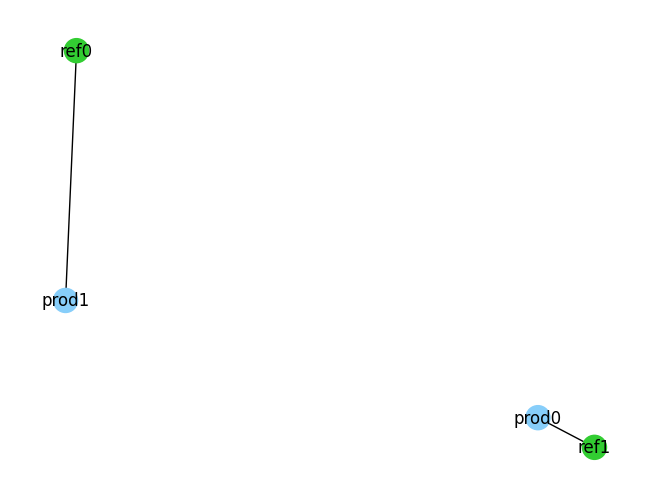

(id: 1) SURVIVED as (id: 1)
(id: 0) SURVIVED as (id: 0)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

timestamp 200 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.8364789849374534), np.float64(4.353584052585992), np.float64(8.021808368403699), np.float64(7.818861740391416), np.float64(7.602761765805618), np.float64(6.454463438289908), np.float64(5.558248551880427), np.float64(2.5067777437408187), np.float64(6.145178541904547), np.float64(2.9154270073262882), np.float64(5.931810980889877), np.float64(2.7013048762227863), np.float64(5.505888732468162), np.float64(4.7827581806880675), np.float64(4.842661372045214), np.float64(5.748725539300553)]
prod0 - center: [np.float64(3.7798575577912503), np.float64(4.259315834663533), np.float64(8.109085134223655), np.float64(7.848283893090707), np.float64(7.770666066805521), np.float64(6.492042595368844), np.float64(5.577373104625278), np.float64(2.43676351

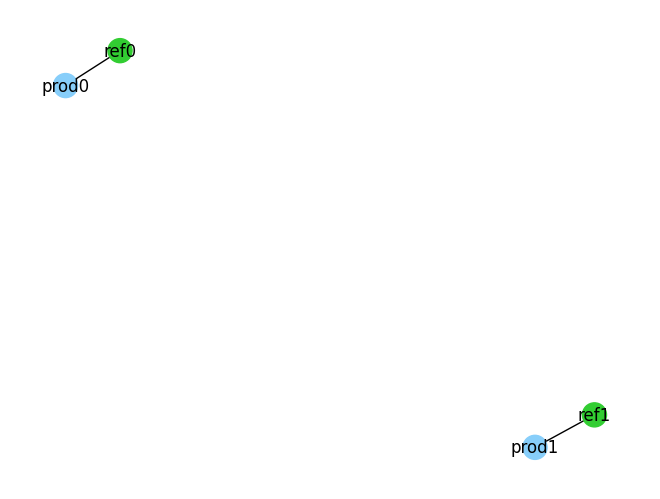

(id: 0) SURVIVED as (id: 0)
(id: 1) SURVIVED as (id: 1)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

timestamp 300 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.7798575577912503), np.float64(4.259315834663533), np.float64(8.109085134223655), np.float64(7.848283893090707), np.float64(7.770666066805521), np.float64(6.492042595368844), np.float64(5.577373104625278), np.float64(2.4367635190486907), np.float64(6.1217920709539335), np.float64(2.8669990667590395), np.float64(5.8580787702843), np.float64(2.7968498905499777), np.float64(5.5592929266117235), np.float64(4.811345658478913), np.float64(4.798465339342753), np.float64(5.665846830827219)]
prod0 - center: [np.float64(3.087834208174279), np.float64(3.330760501629492), np.float64(8.480709751803817), np.float64(8.06452155228246), np.float64(8.929567830454845), np.float64(6.572994826876645), np.float64(5.748012512325999), np.float64(1.82354844727

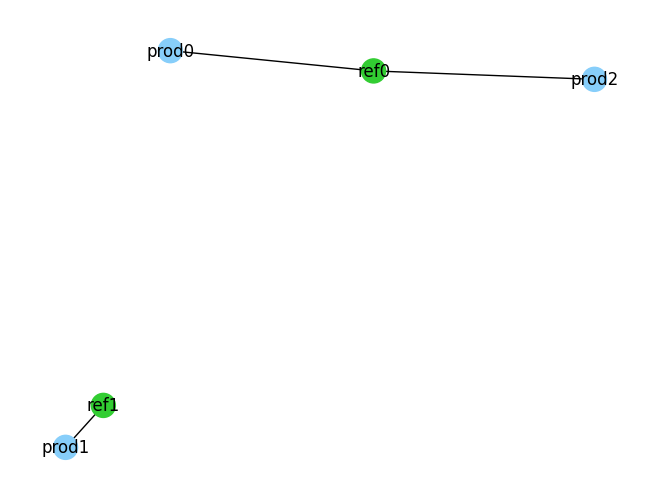

(id: 0) SURVIVED as (id: 0)
(id: 1) SURVIVED as (id: 1)
(!) (id: 0) SURVIVED as (id: 2) but a SPLITTING is needed
(!) Updated cluster id from 0 -> 3 due to the SPLITTING

Final macroclusters:
(id: 3)
(id: 1)
(id: 2)

-----------------------------------------------------------------------------------

timestamp 400 ----> Apply macroclustering <!>

ref3 - center: [np.float64(3.087834208174279), np.float64(3.330760501629492), np.float64(8.480709751803817), np.float64(8.06452155228246), np.float64(8.929567830454845), np.float64(6.572994826876645), np.float64(5.748012512325999), np.float64(1.823548447274886), np.float64(6.075396202850847), np.float64(2.4093086821950673), np.float64(5.3577443425316265), np.float64(3.738329509136972), np.float64(6.299518953805646), np.float64(4.848852899365601), np.float64(4.293719307736219), np.float64(4.803472323730924)]
prod0 - center: [np.float64(3.0867662718905504), np.float64(3.3091252652431606), np.float64(8.527613853292609), np.float64(8.0566335860341

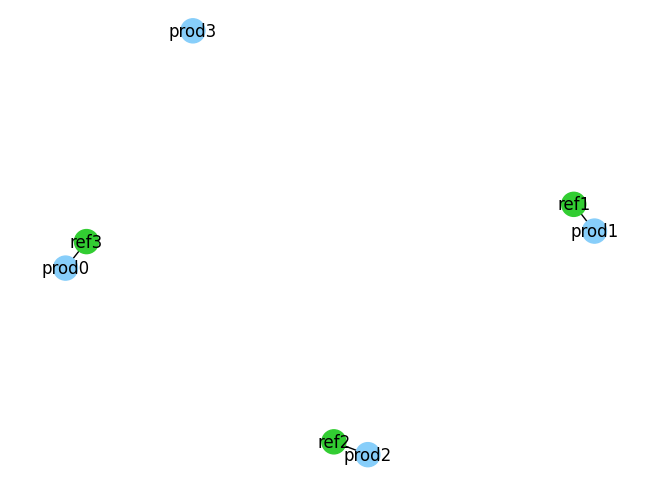

(id: 3) SURVIVED as (id: 3)
(id: 1) SURVIVED as (id: 1)
(id: 2) SURVIVED as (id: 2)
(!) (id: 4) APPEARED

Final macroclusters:
(id: 3)
(id: 1)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------

timestamp 500 ----> Apply macroclustering <!>

ref3 - center: [np.float64(3.0867662718905504), np.float64(3.3091252652431606), np.float64(8.527613853292609), np.float64(8.056633586034142), np.float64(8.980189405282273), np.float64(6.5944128346114494), np.float64(5.735399721398826), np.float64(1.8166934291589265), np.float64(6.058387908509243), np.float64(2.3774876788532513), np.float64(5.314414708477617), np.float64(3.73155308882824), np.float64(6.2688375699020975), np.float64(4.878141151937004), np.float64(4.265897927852129), np.float64(4.791568045493729)]
prod0 - center: [np.float64(3.0242005050287464), np.float64(3.1646779088663246), np.float64(8.478122278590003), np.float64(8.053277465916294), np.float64(8.982337942013492), np.float64(6.5728

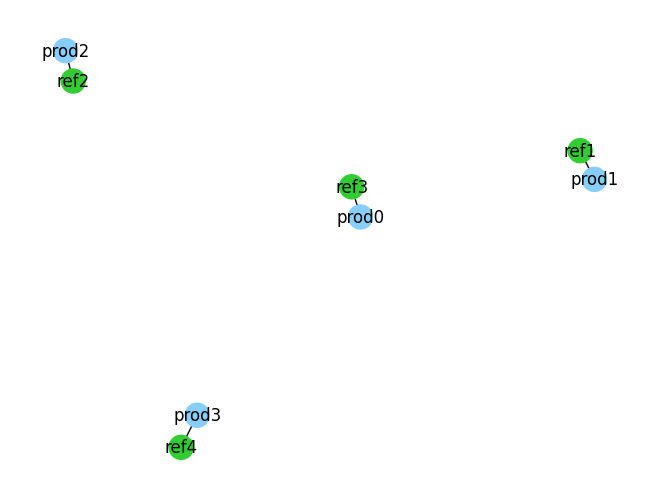

(id: 3) SURVIVED as (id: 3)
(id: 1) SURVIVED as (id: 1)
(id: 2) SURVIVED as (id: 2)
(id: 4) SURVIVED as (id: 4)

Final macroclusters:
(id: 3)
(id: 1)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------

timestamp 600 ----> Apply macroclustering <!>

ref3 - center: [np.float64(3.0242005050287464), np.float64(3.1646779088663246), np.float64(8.478122278590003), np.float64(8.053277465916294), np.float64(8.982337942013492), np.float64(6.572848904738839), np.float64(5.730797994628496), np.float64(1.825856249564323), np.float64(6.053525419904762), np.float64(2.3582813760948773), np.float64(5.276526036073874), np.float64(3.751928698577773), np.float64(6.278634094979252), np.float64(4.878814795694237), np.float64(4.221550095700998), np.float64(4.773656063925734)]
prod0 - center: [np.float64(3.050016055862058), np.float64(3.159480790408809), np.float64(8.46803525077298), np.float64(8.104745266167779), np.float64(8.999370788081562), np.float64(6.60

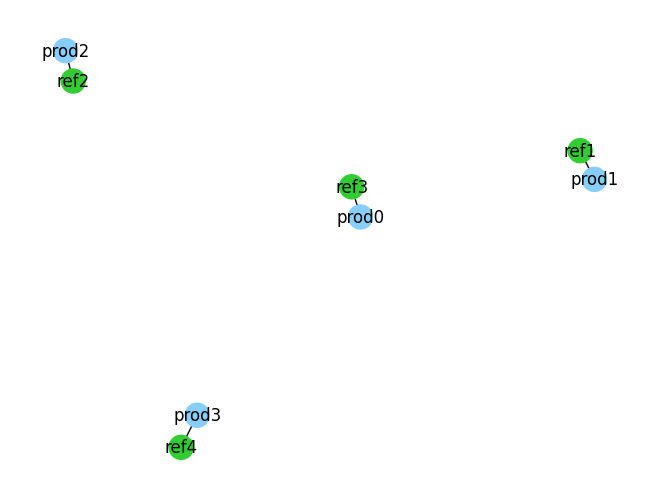

(id: 3) SURVIVED as (id: 3)
(id: 1) SURVIVED as (id: 1)
(id: 2) SURVIVED as (id: 2)
(id: 4) SURVIVED as (id: 4)

Final macroclusters:
(id: 3)
(id: 1)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------

timestamp 700 ----> Apply macroclustering <!>

ref3 - center: [np.float64(3.050016055862058), np.float64(3.159480790408809), np.float64(8.46803525077298), np.float64(8.104745266167779), np.float64(8.999370788081562), np.float64(6.6093649172428774), np.float64(5.764772010867014), np.float64(1.8057174988454894), np.float64(6.030583951533328), np.float64(2.4121218931144295), np.float64(5.304303876873927), np.float64(3.8416782104886136), np.float64(6.411353134308982), np.float64(4.814200650161196), np.float64(4.239060192693477), np.float64(4.734803988574322)]
prod0 - center: [np.float64(3.092607128307428), np.float64(3.1753307224416876), np.float64(8.553165435947912), np.float64(8.13759353212573), np.float64(9.092069521507034), np.float64(6.6

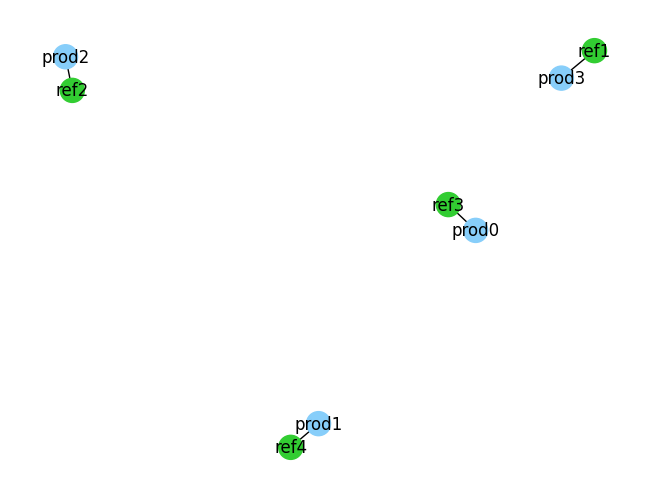

(id: 3) SURVIVED as (id: 3)
(id: 4) SURVIVED as (id: 4)
(id: 2) SURVIVED as (id: 2)
(id: 1) SURVIVED as (id: 1)

Final macroclusters:
(id: 3)
(id: 1)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------

timestamp 800 ----> Apply macroclustering <!>

ref3 - center: [np.float64(3.092607128307428), np.float64(3.1753307224416876), np.float64(8.553165435947912), np.float64(8.13759353212573), np.float64(9.092069521507034), np.float64(6.662474711588571), np.float64(5.795759523748563), np.float64(1.7553598195383675), np.float64(6.007832329987424), np.float64(2.3919887384913854), np.float64(5.291897222941543), np.float64(3.9575885488791194), np.float64(6.532624888446586), np.float64(4.787011969476322), np.float64(4.193226423217859), np.float64(4.637486832962505)]
prod0 - center: [np.float64(3.0633103849226337), np.float64(3.1154447116180037), np.float64(8.483889776572214), np.float64(8.122092847541255), np.float64(9.040677774296253), np.float64(6

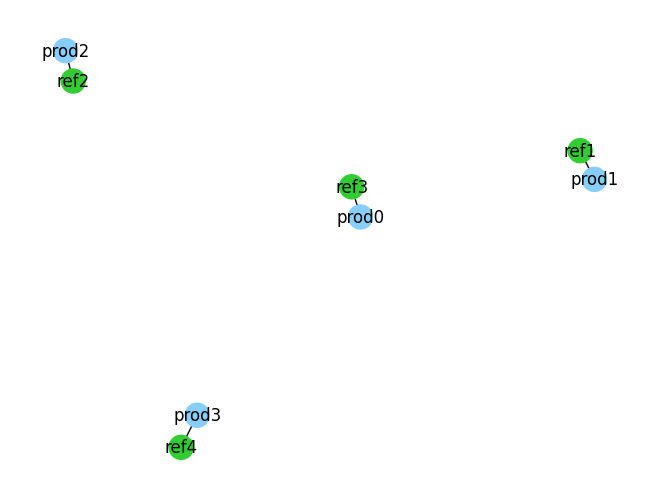

(id: 3) SURVIVED as (id: 3)
(id: 1) SURVIVED as (id: 1)
(id: 2) SURVIVED as (id: 2)
(id: 4) SURVIVED as (id: 4)

Final macroclusters:
(id: 3)
(id: 1)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------

timestamp 900 ----> Apply macroclustering <!>

ref3 - center: [np.float64(3.0633103849226337), np.float64(3.1154447116180037), np.float64(8.483889776572214), np.float64(8.122092847541255), np.float64(9.040677774296253), np.float64(6.6307078229419805), np.float64(5.7833151783105246), np.float64(1.789579879003943), np.float64(6.01658471828778), np.float64(2.3957144054419297), np.float64(5.299699425484495), np.float64(3.9010385750632826), np.float64(6.466945427141249), np.float64(4.798719294259497), np.float64(4.190677437775291), np.float64(4.692656470208194)]
prod0 - center: [np.float64(3.778860308037473), np.float64(4.282165438654431), np.float64(9.470572893458462), np.float64(8.33289499044855), np.float64(9.761918317396429), np.float64(7.

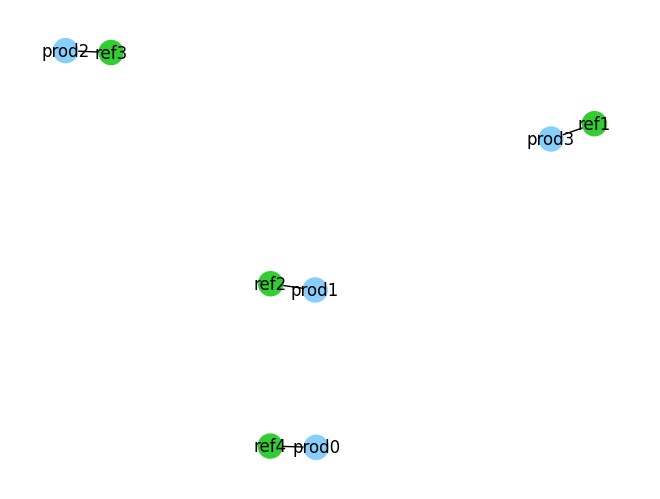

(id: 4) SURVIVED as (id: 4)
(id: 2) SURVIVED as (id: 2)
(id: 3) SURVIVED as (id: 3)
(id: 1) SURVIVED as (id: 1)

Final macroclusters:
(id: 3)
(id: 1)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------

timestamp 1000 ----> Apply macroclustering <!>

ref3 - center: [np.float64(3.094265391502417), np.float64(3.0966849117580755), np.float64(8.572261334342627), np.float64(8.166380931275942), np.float64(9.17219934251936), np.float64(6.707978500966306), np.float64(5.820381890591637), np.float64(1.7320049605702568), np.float64(5.974026906134835), np.float64(2.391531926428056), np.float64(5.258226020417341), np.float64(4.039775122691558), np.float64(6.615222420880346), np.float64(4.763726697579971), np.float64(4.14217739788684), np.float64(4.578155229198118)]
prod0 - center: [np.float64(3.365941491167424), np.float64(3.624953367952573), np.float64(8.958477555695227), np.float64(8.235415495048136), np.float64(9.425635786379798), np.float64(6.998

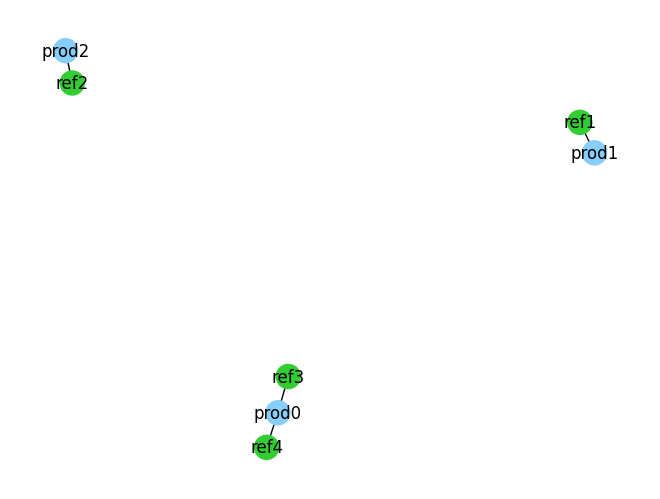

(!) [3, 4] are MERGED in (id: 5)
(id: 1) SURVIVED as (id: 1)
(id: 2) SURVIVED as (id: 2)

Final macroclusters:
(id: 1)
(id: 2)
(id: 5)

-----------------------------------------------------------------------------------



In [208]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(
    print_graph=True, print_statistics=True, macroclustering_at_end=False
)

Creating the directory...
Drawing ...


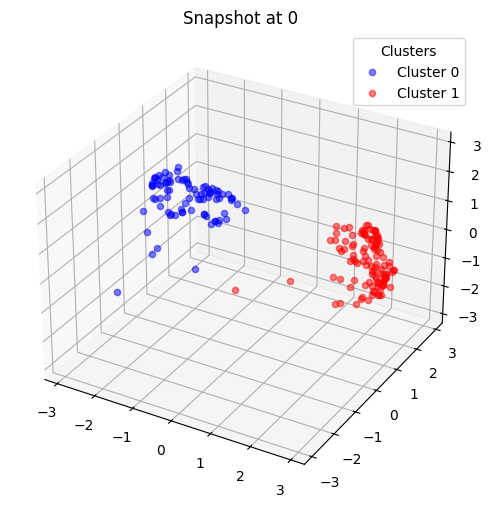

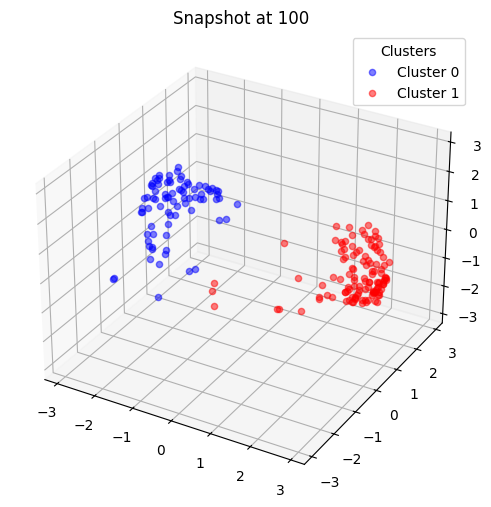

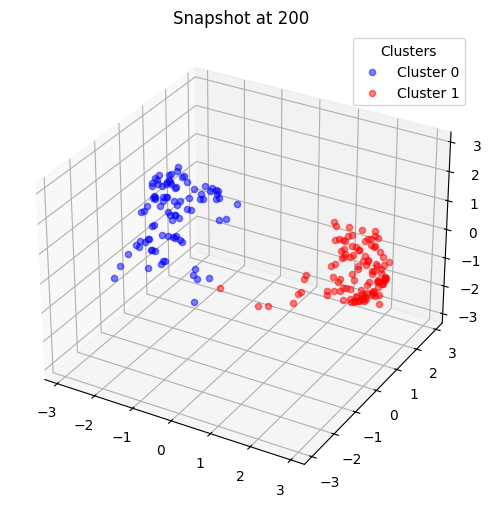

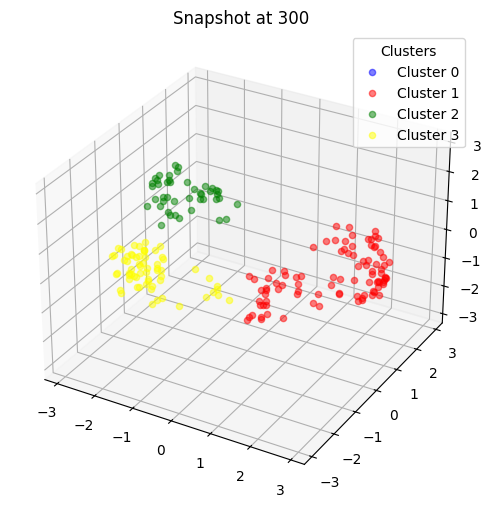

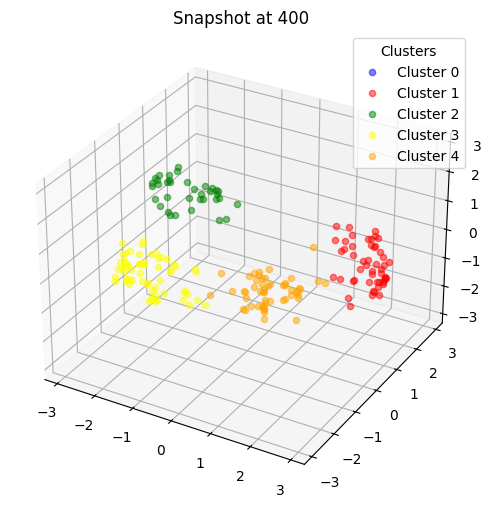

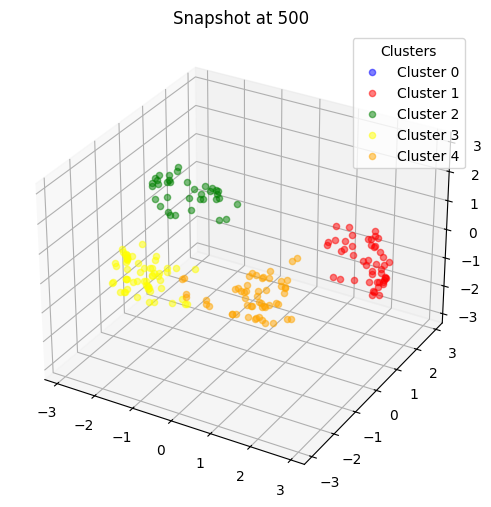

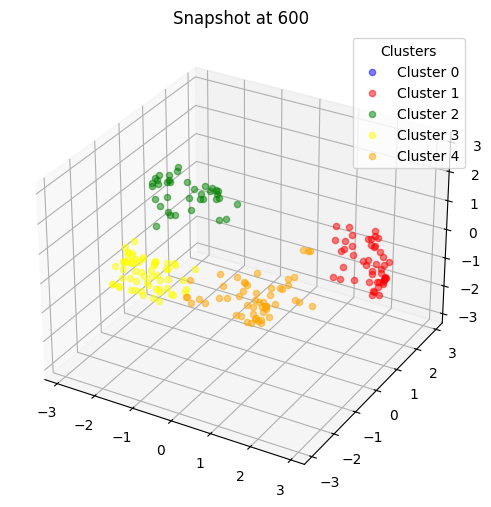

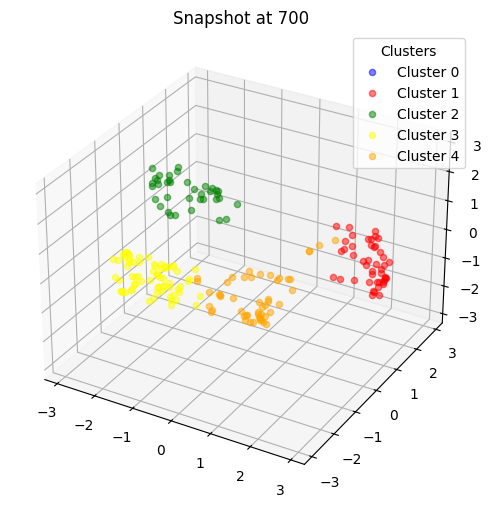

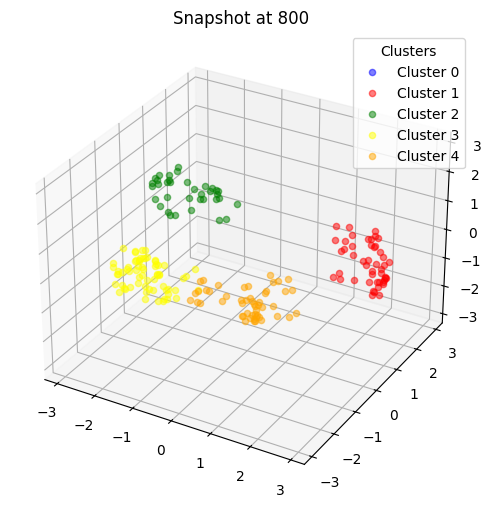

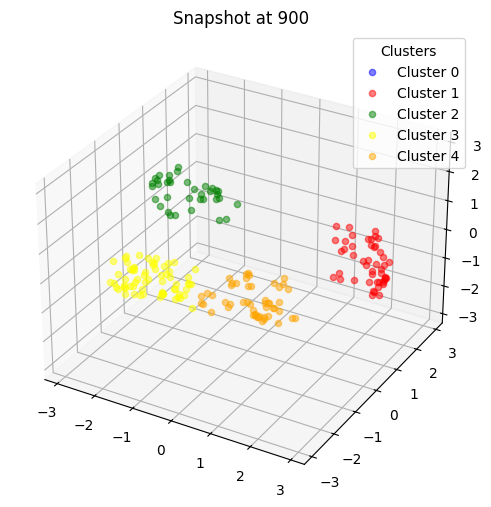

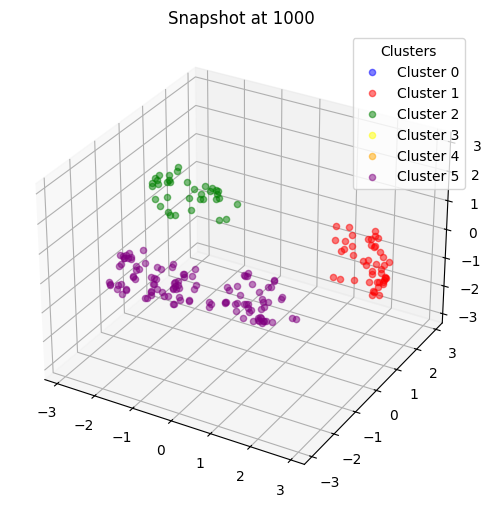

Directory './plots/87061' and its contents removed successfully.


In [209]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True, clean=True)